In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [92]:
df = pd.read_csv("Book12.csv")

In [93]:
enc = LabelEncoder()
enc.fit(df['city'])
df['city'] = enc.transform(df['city'])
df.head(10)

,year,sem,city,humidity,winddir,tempmax,tempmin,temp,feelslikemax,dew,feelslike,feelslikemin,windspeed,visibility,moonphase,cloudcover,hec,production
0,2009,1,0,77.208706,142.910588,30.314118,24.914118,27.862941,35.094118,23.321765,31.041176,25.493529,8.364118,19.768235,0.529706,48.948824,381,3628
1,2009,1,1,76.983765,153.231177,30.619412,24.499412,27.540588,34.736471,22.765294,29.867647,24.797647,6.389412,16.625882,0.527059,48.827059,523,3892
2,2009,1,2,77.996588,210.491765,26.628824,16.753529,21.621765,27.669412,17.192353,21.967059,16.752353,8.430588,17.942353,0.528882,52.427647,460,3770
3,2009,1,3,77.824479,132.336810,30.842331,25.957055,28.476687,36.906748,24.065644,32.544172,27.247853,9.525767,20.000000,0.526994,44.647853,142,639
4,2009,1,25,75.642557,172.565341,31.246591,24.432386,27.700568,36.069318,22.744318,30.566477,25.180114,20.609091,12.073864,0.521761,45.026136,30,423
5,2009,1,4,81.492611,203.768790,11.482166,3.991720,7.675159,9.991720,4.343312,5.459236,0.843949,26.100000,9.219108,0.518854,54.048408,30,423
6,2009,1,5,78.075172,177.028161,23.912644,15.386207,19.507471,23.968391,15.239080,19.533333,15.386207,9.295402,17.809770,0.521839,54.884483,30,423
7,2009,1,6,82.071420,202.193491,29.782840,25.335503,27.446154,35.277515,23.988166,30.533728,26.039053,20.427219,23.910059,0.524615,57.239053,231,1635
8,2009,1,7,74.068598,167.715244,30.445122,27.609756,29.173780,36.021341,23.906707,33.881707,31.065244,13.995732,19.825610,0.526707,51.249390,325,4692
9,2009,1,8,75.664205,174.212500,31.246023,24.415341,27.690341,36.006818,22.739205,30.522727,25.143750,20.605114,11.402841,0.521761,45.040341,129,835


In [94]:
df=df.dropna().reset_index(drop=True)

In [95]:
X = df[['city', 'sem','tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','windspeed','moonphase','cloudcover','visibility','winddir','hec']].values

y = df['production'].values

In [96]:
X = df[['city', 'sem','tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','windspeed','moonphase','cloudcover','visibility','winddir','hec']].values

y = df['production'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [97]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [98]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [99]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9999999820166514


In [100]:
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.66


In [101]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.76


In [102]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

MSE: 718709.08


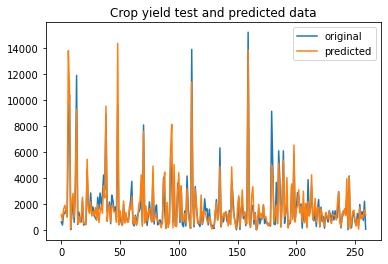

In [103]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Crop yield test and predicted data")
plt.legend()
plt.show()